In [34]:
import time
import numpy as np
from IPython.display import display, Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
import pandas as pd
from hmmlearn import hmm
import numpy as np
import seaborn as sns
from scipy.stats import norm
import itertools
import matplotlib.pyplot as plt
from hmmlearn.hmm import GMMHMM
from  sklearn.metrics import mean_squared_error as mse
from astropy.io import fits
import matplotlib.pyplot as plt
import os, sys



import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

def plot_gp(mu, cov, X, X_train=None, Y_train=None, samples=[]):
    X = X.ravel()
    mu = mu.ravel()
    uncertainty = 1.96 * np.sqrt(np.diag(cov))
    
    plt.fill_between(X, mu + uncertainty, mu - uncertainty, alpha=0.1)
    plt.plot(X, mu, label='Mean')
    for i, sample in enumerate(samples):
        plt.plot(X, sample, lw=1, ls='--', label=f'Sample {i+1}')
    if X_train is not None:
        plt.plot(X_train, Y_train, 'rx')
    plt.legend()

def plot_gp_2D(gx, gy, mu, X_train, Y_train, title, i):
    ax = plt.gcf().add_subplot(1, 2, i, projection='3d')
    ax.plot_surface(gx, gy, mu.reshape(gx.shape), cmap=cm.coolwarm, linewidth=0, alpha=0.2, antialiased=False)
    ax.scatter(X_train[:,0], X_train[:,1], Y_train, c=Y_train, cmap=cm.coolwarm)
    ax.set_title(title)

In [2]:
class_type = 'CANDIDATE'
folder_lc = "/work/work_teamEXOPLANET/KOI_LC/"
#Clean Light Curves
lc_kepler = np.load(folder_lc+"cleaned/LC_kepler_processed.npy" )   
lc_kepler_times = np.load('/work/work_teamEXOPLANET/KOI_LC/npy/KOI_LC_time.npy')

In [3]:
#borrar nans... arreglo variable
X_lc = []
X_time = []
for i in range(lc_kepler_times.shape[0]):
    mask_nan_aux = np.isnan(lc_kepler[i])
    X_lc.append(lc_kepler[i][~mask_nan_aux])
    X_time.append(lc_kepler_times[i][~mask_nan_aux])
    
X_lc = np.asarray(X_lc)
X_time = np.asarray(X_time)

In [11]:
X_lc.shape

(8054,)

In [12]:
X_time.shape

(8054,)

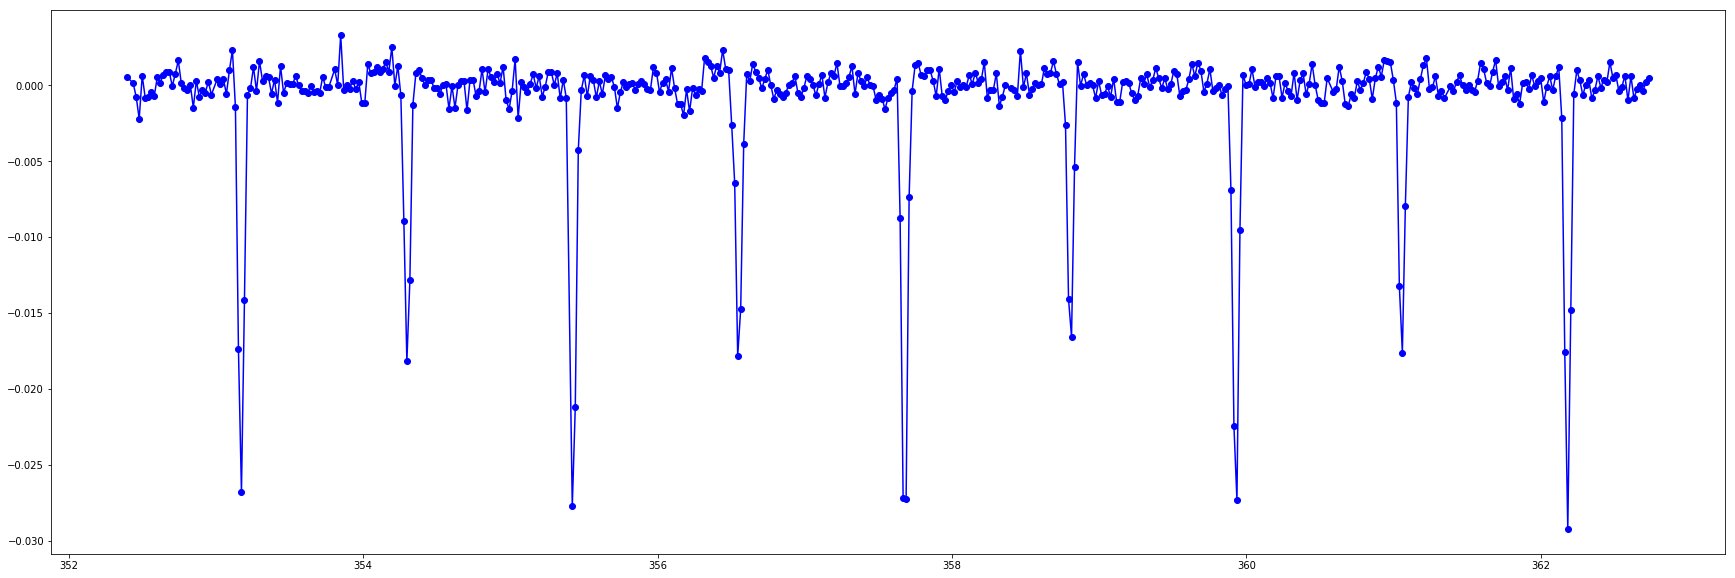

In [25]:
indice = 17

plt.figure(figsize=(30,10))
plt.plot(X_time[indice][:500],X_lc[indice][0:500],'bo-')
plt.show()

ValueError: operands could not be broadcast together with shapes (54621,) (500,) 

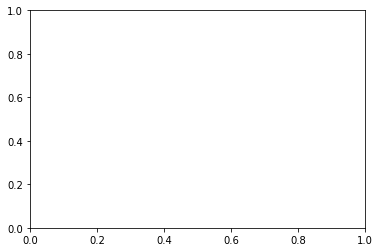

In [36]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF

rbf = ConstantKernel(1.0) * RBF(length_scale=1.0)
gpr = GaussianProcessRegressor(kernel=rbf, alpha=0.8)

gpr.fit(X_time[indice][:500].reshape(-1, 1),X_lc[indice][:500].reshape(-1, 1))

# Compute posterior predictive mean and covariance
mu_s, cov_s = gpr.predict(X_time[indice][:500].reshape(-1, 1), return_cov=True)

# Obtain optimized kernel parameters
l = gpr.kernel_.k2.get_params()['length_scale']
sigma_f = np.sqrt(gpr.kernel_.k1.get_params()['constant_value'])

# Compare with previous results
#assert(np.isclose(l_opt, l))
#assert(np.isclose(sigma_f_opt, sigma_f))

# Plot the results
plot_gp(mu_s, cov_s, X_time[indice], X_train=X_time[indice][:500], Y_train=X_lc[indice][:500])
